## 데이터 시각화 - 막대그래프, 히스토그램

### 시각화 사유: 매장혼잡도를 나타내는 column 추가를 위해, 합계의 분포와 실질적 수 파악을 위해 시각화 진행
* 실질적으로, 혼잡은 2학기가 굉장히 혼잡했기 때문에 2학기로 시각화를 진행함.

#### 라이브러리 임포트 및 데이터 불러오기
* numpy
* pandas
* matplotlib

In [36]:
# 코드에 필요한 라이브러리 임포트

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# 가지고 올 데이터 임포트

df = pd.read_excel("../resource/dayoftheweek_add.xlsx")
df.head()

,일자,semester,season,event,time,합계,day of the week
0,2022-03-02,1,0,0,8,15,2
1,2022-03-02,1,0,0,9,12,2
2,2022-03-02,1,0,0,10,18,2
3,2022-03-02,1,0,0,11,39,2
4,2022-03-02,1,0,0,12,34,2


In [29]:
# 2학기 데이터만 볼 수 있도록 mask 처리

semester_df = df[df['semester'] == 2]
semester_df.head()

,일자,semester,season,event,time,합계,day of the week
726,2022-09-01,2,10,0,8,28,3
727,2022-09-01,2,10,0,9,31,3
728,2022-09-01,2,10,0,10,38,3
729,2022-09-01,2,10,0,11,102,3
730,2022-09-01,2,10,0,12,86,3


#### 시각화에 필요한 데이터 전처리

* 아침(8-10), 점심(11-14), 오후(15-17)로 데이터 프레임 나누기
  * 아침(8-10) : morning
  * 점심(11-14) : lunch
  * 오후(15-17) : afternoon

In [30]:
morning = semester_df[semester_df['time'] < 11]
afternoon = semester_df[semester_df['time'] > 14]

In [31]:
morning.head()

,일자,semester,season,event,time,합계,day of the week
726,2022-09-01,2,10,0,8,28,3
727,2022-09-01,2,10,0,9,31,3
728,2022-09-01,2,10,0,10,38,3
736,2022-09-02,2,10,0,8,23,4
737,2022-09-02,2,10,0,9,28,4


In [32]:
afternoon.head()

,일자,semester,season,event,time,합계,day of the week
733,2022-09-01,2,10,0,15,16,3
734,2022-09-01,2,10,0,16,16,3
735,2022-09-01,2,10,0,17,7,3
743,2022-09-02,2,10,0,15,13,4
744,2022-09-02,2,10,0,16,7,4


In [33]:
lunch_e = semester_df[semester_df['time'] > 10]
lunch = lunch_e[lunch_e['time'] < 15]

lunch.head()

,일자,semester,season,event,time,합계,day of the week
729,2022-09-01,2,10,0,11,102,3
730,2022-09-01,2,10,0,12,86,3
731,2022-09-01,2,10,0,13,111,3
732,2022-09-01,2,10,0,14,85,3
739,2022-09-02,2,10,0,11,56,4


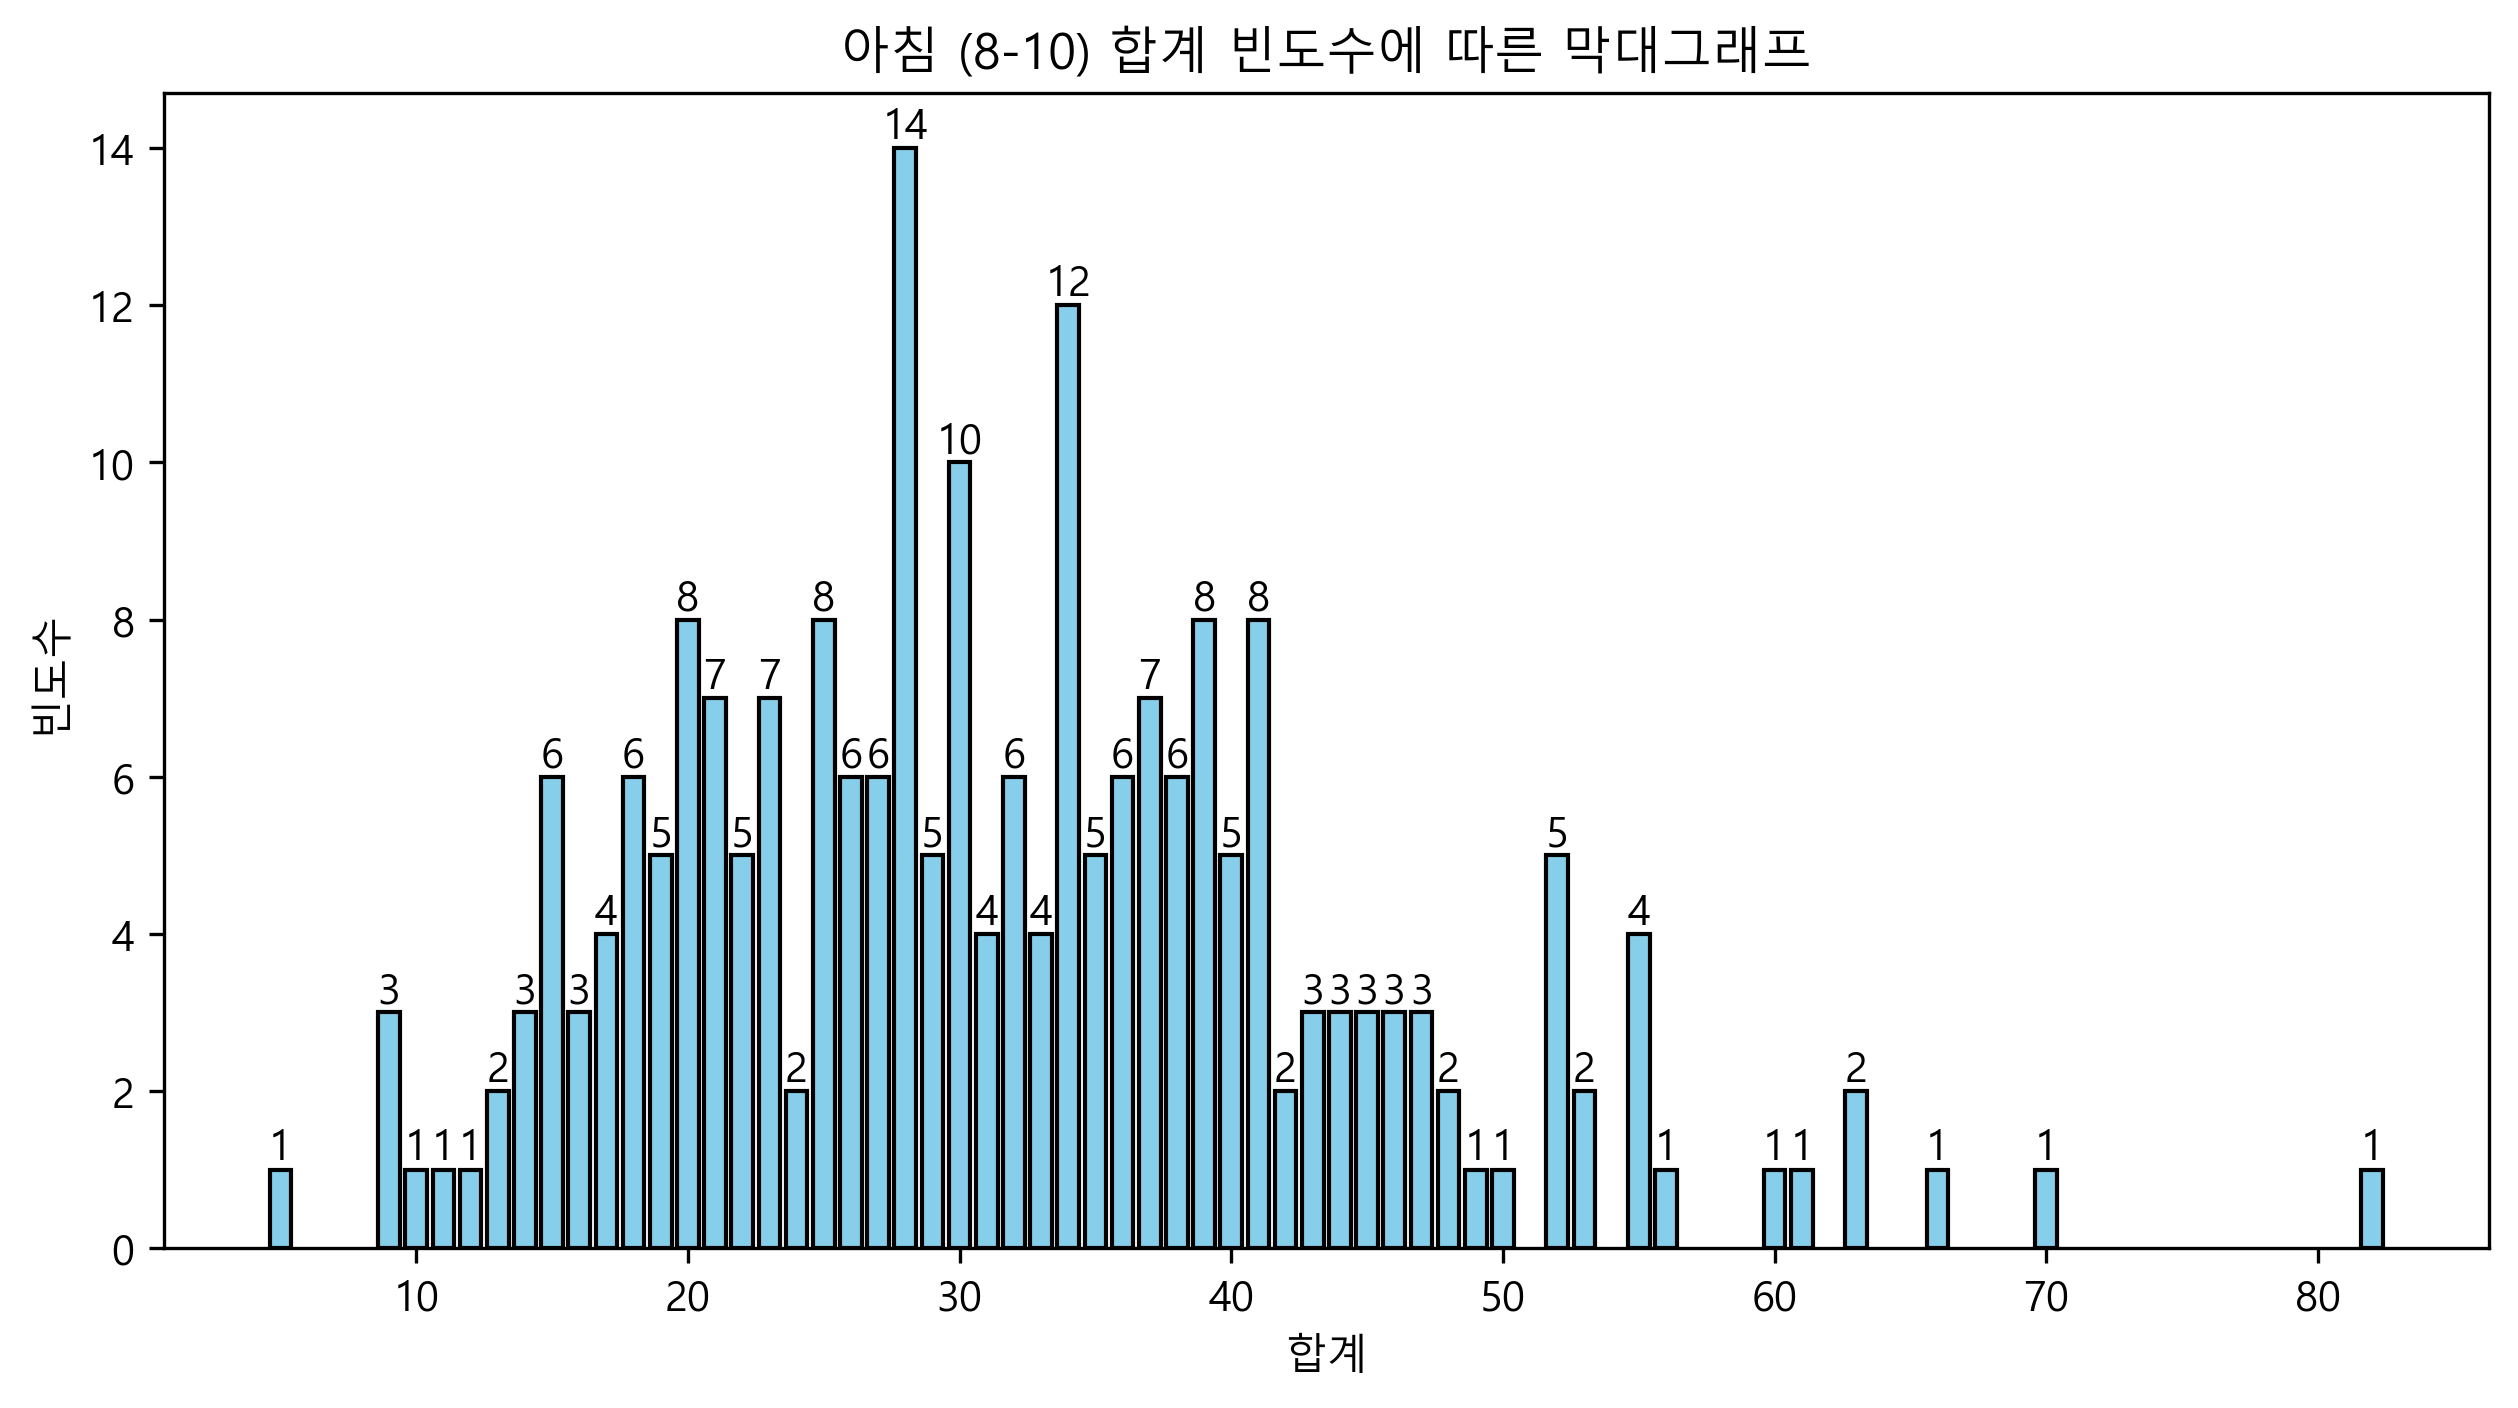

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# '합계' 열에 대한 막대그래프 생성
plt.figure(figsize=(10, 5), dpi=300)
values, counts = np.unique(morning['합계'], return_counts=True)
bars = plt.bar(values, counts, color='skyblue', edgecolor='black')

# 각 막대에 빈도수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# 그래프 제목 및 축 레이블 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.title('아침 (8-10) 합계 빈도수에 따른 막대그래프')
plt.xlabel('합계')
plt.ylabel('빈도수')

# 그래프 표시
plt.show()

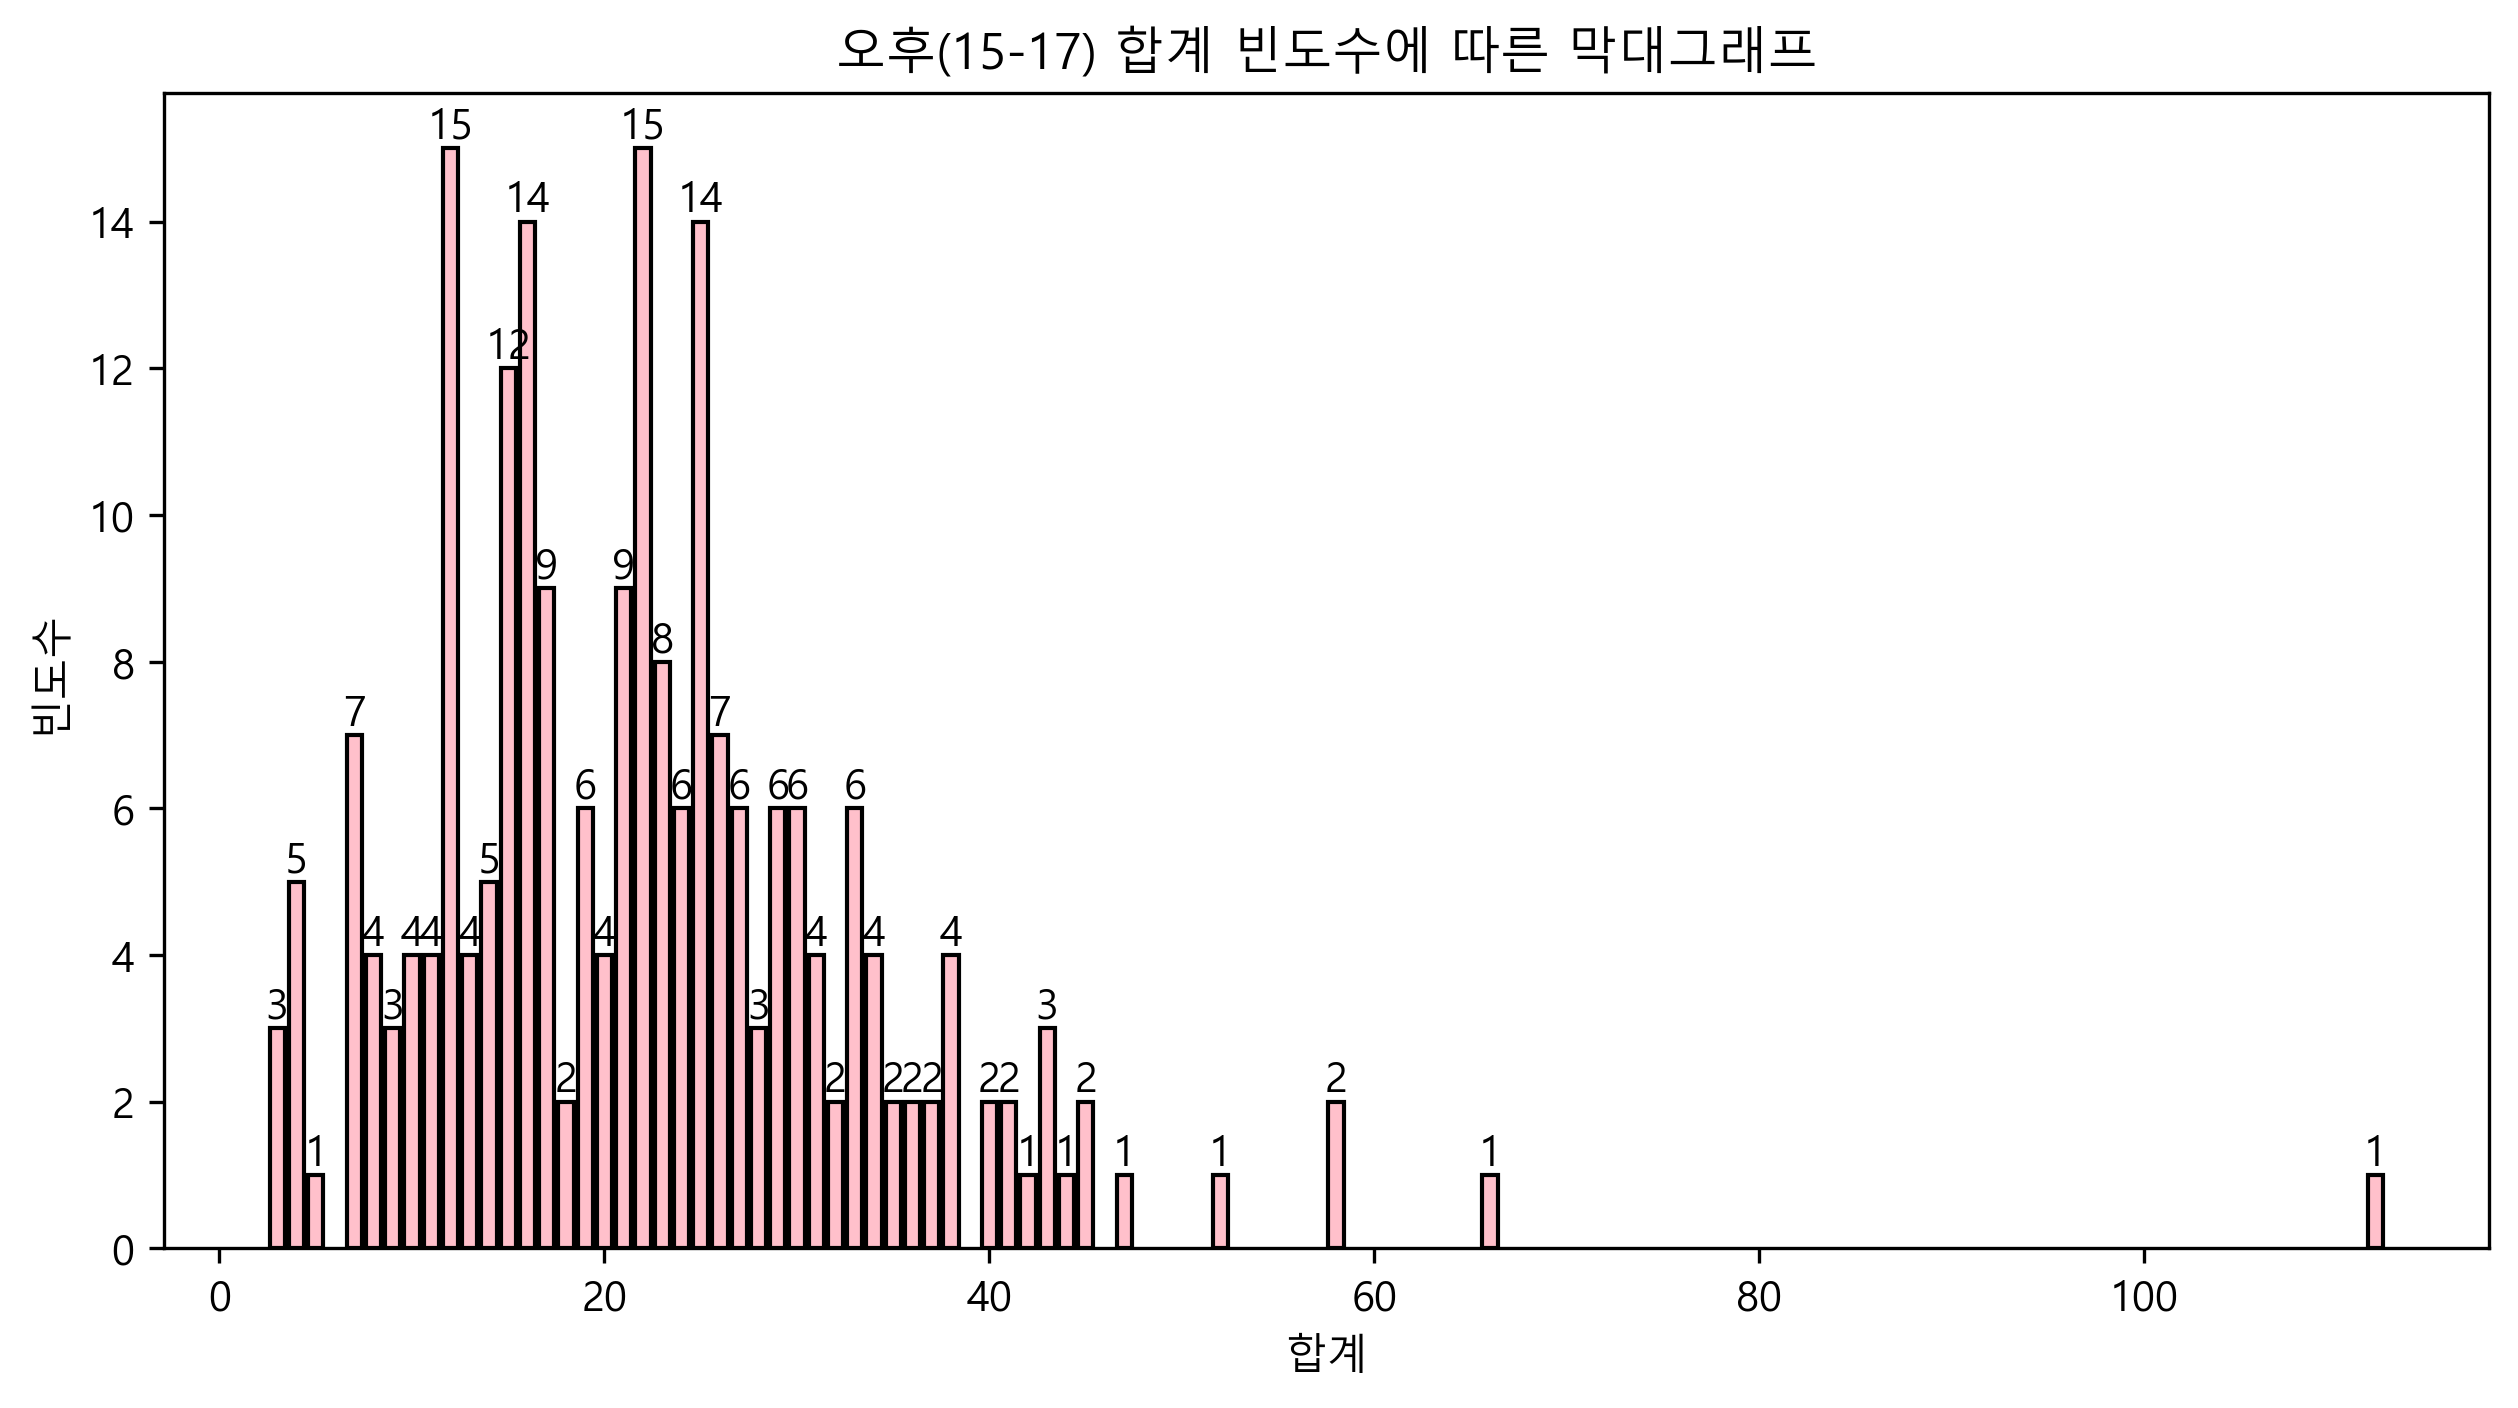

In [15]:
import matplotlib.pyplot as plt

# '합계' 열에 대한 막대그래프 생성
plt.figure(figsize=(10, 5), dpi=300)
values, counts = np.unique(afternoon['합계'], return_counts=True)
bars = plt.bar(values, counts, color='pink', edgecolor='black')

# 각 막대에 빈도수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# 그래프 제목 및 축 레이블 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('오후(15-17) 합계 빈도수에 따른 막대그래프')
plt.xlabel('합계')
plt.ylabel('빈도수')

# 그래프 표시
plt.show()

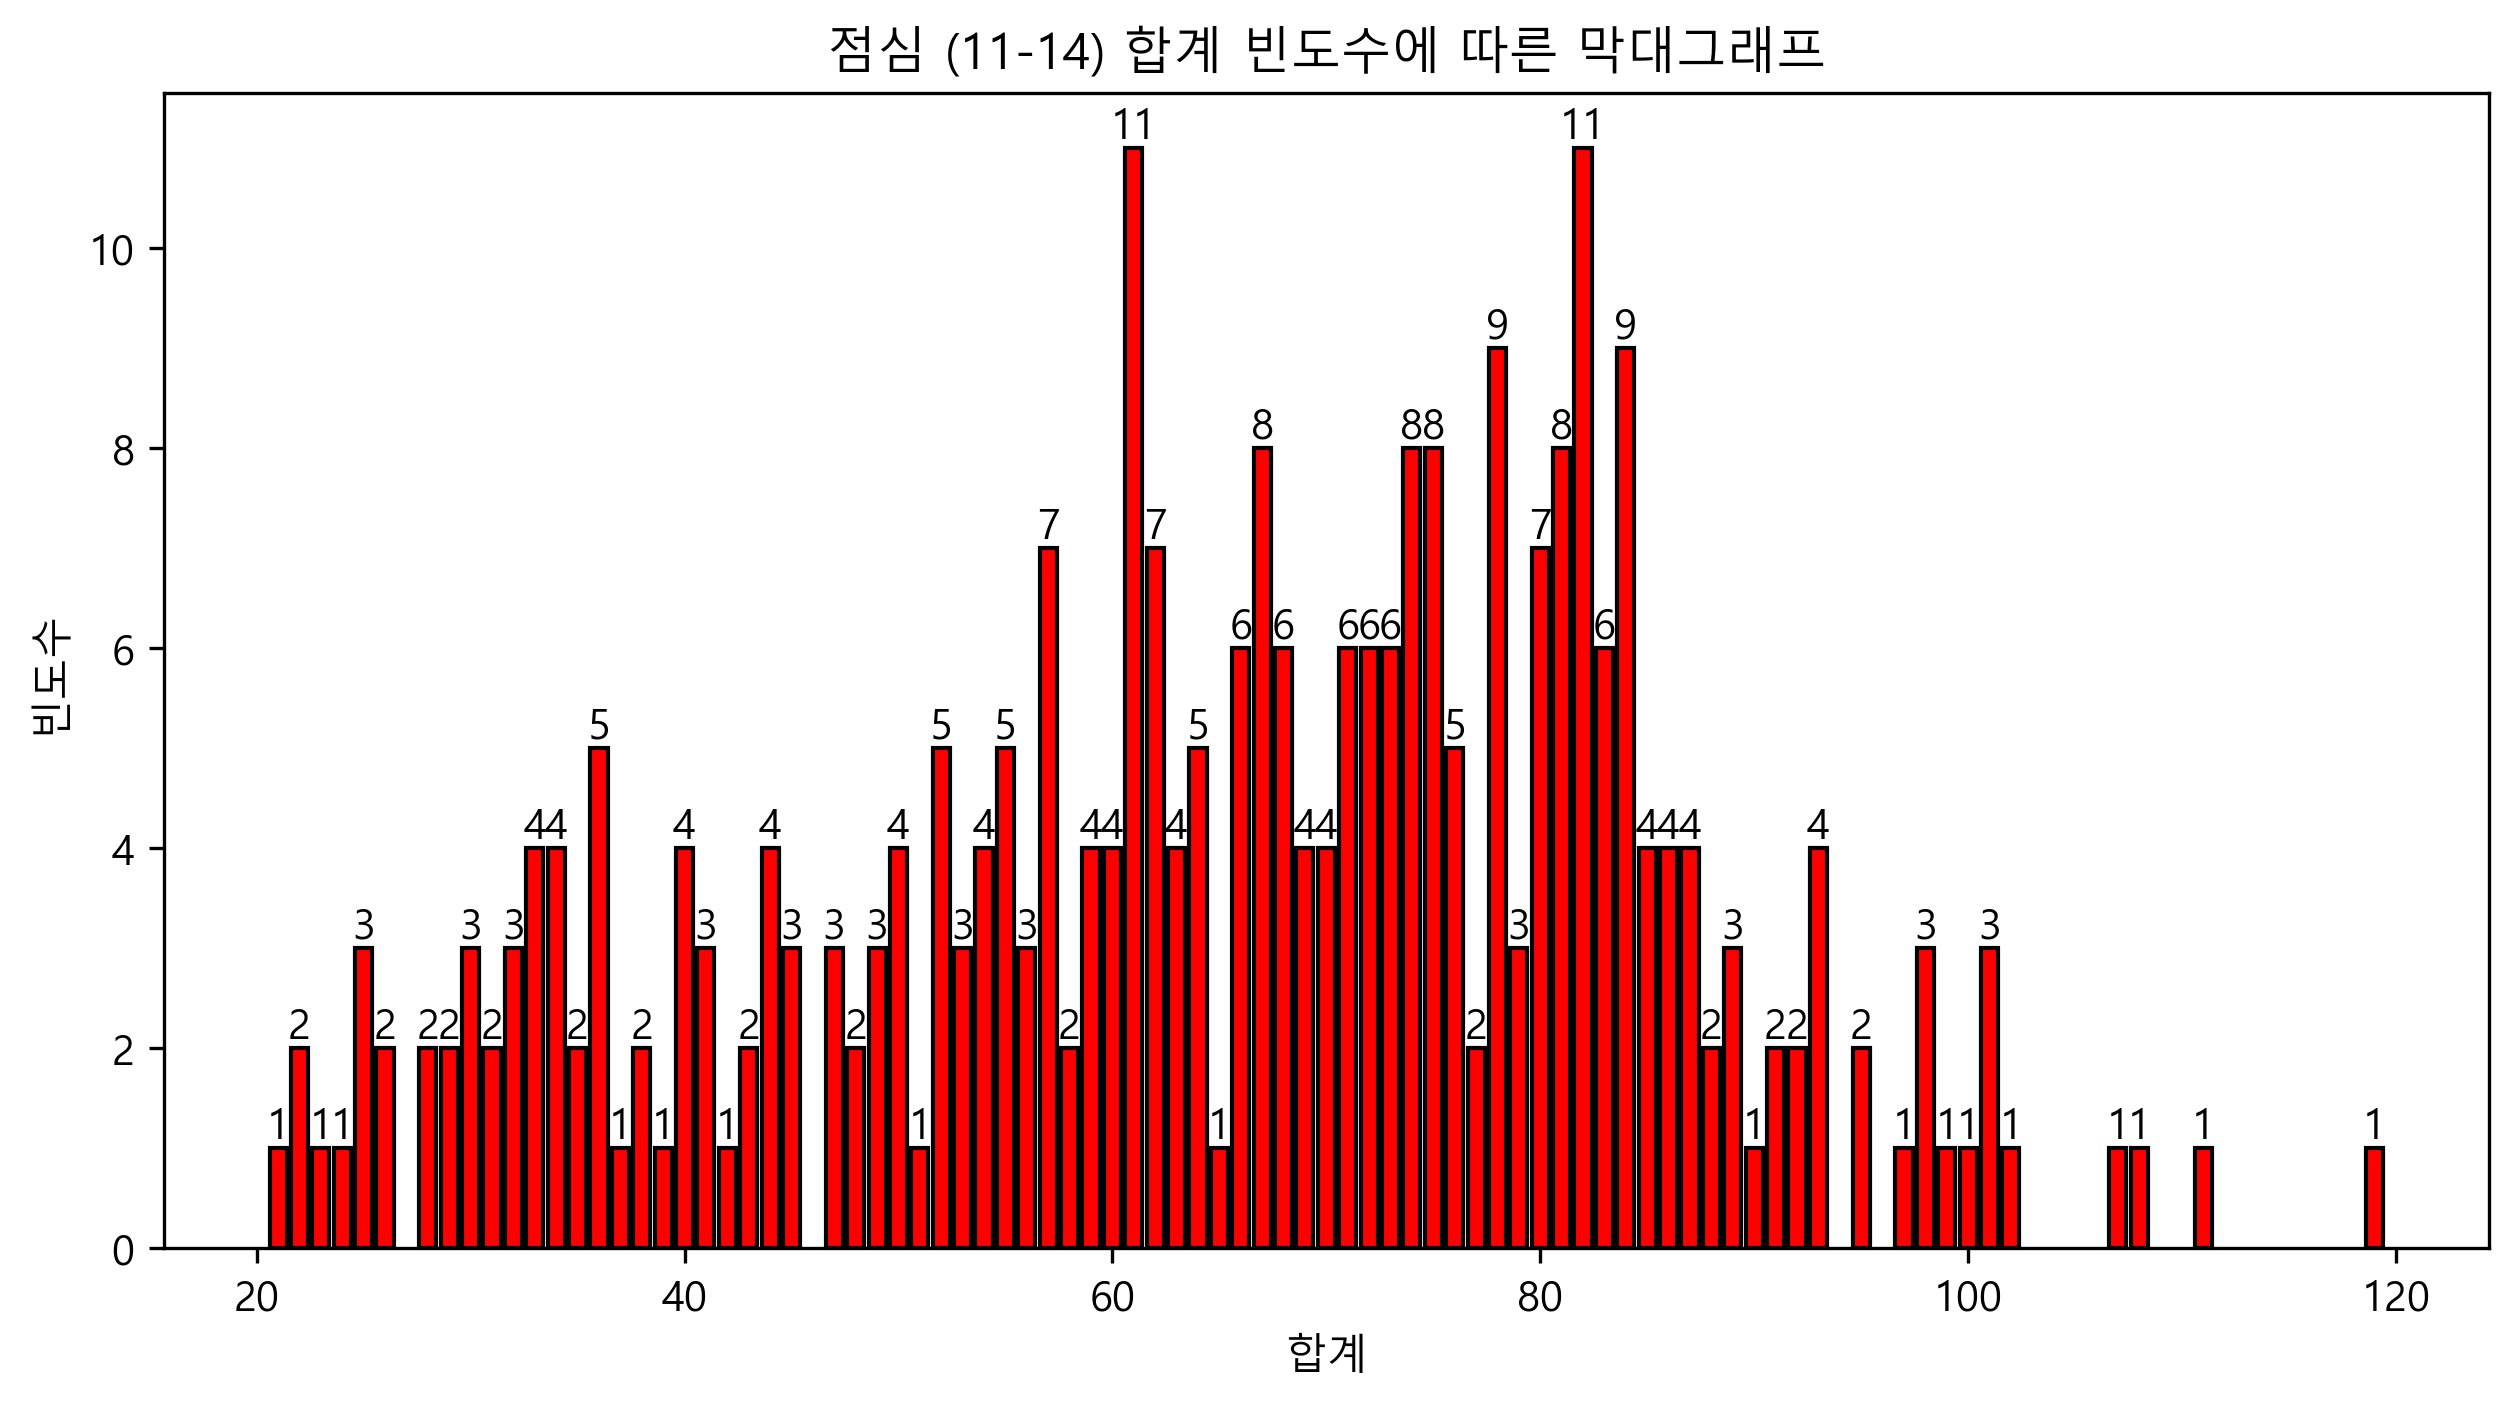

In [16]:
# '합계' 열에 대한 막대그래프 생성
plt.figure(figsize=(10, 5), dpi=300)
values, counts = np.unique(lunch['합계'], return_counts=True)
bars = plt.bar(values, counts, color='red', edgecolor='black')

# 각 막대에 빈도수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# 그래프 제목 및 축 레이블 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('점심 (11-14) 합계 빈도수에 따른 막대그래프')
plt.xlabel('합계')
plt.ylabel('빈도수')

# 그래프 표시
plt.show()

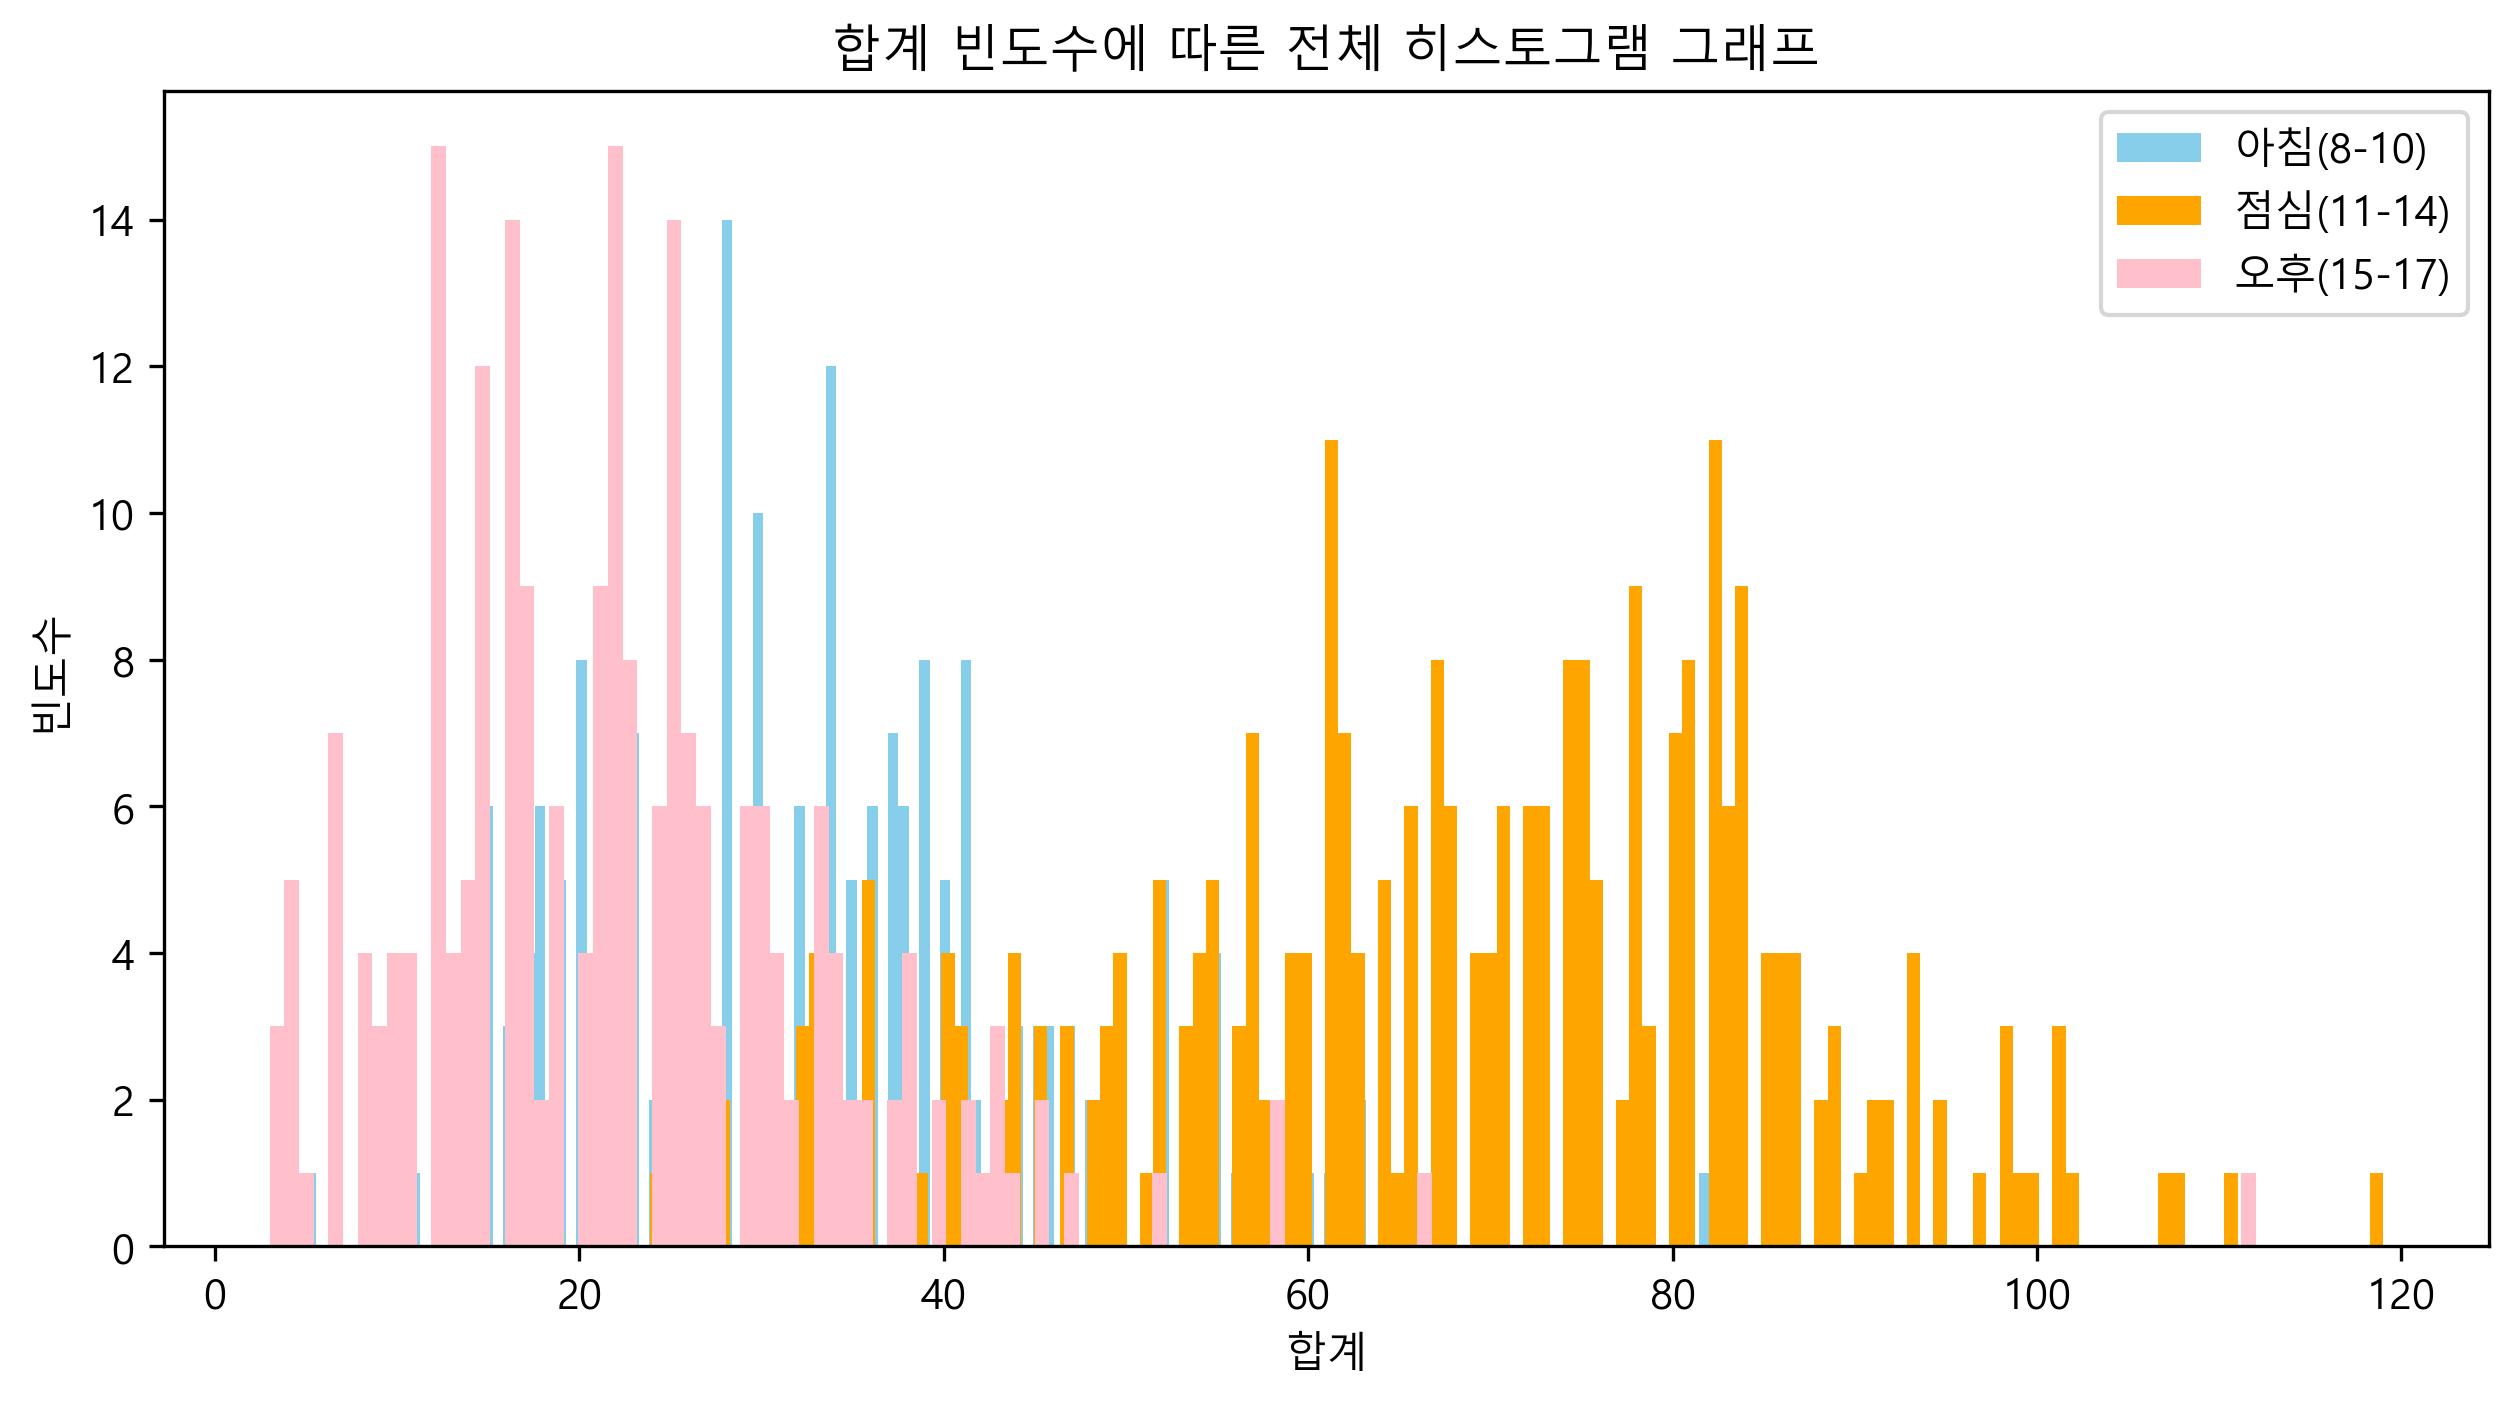

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=300)

plt.hist(morning['합계'], bins=135, color='skyblue', label='아침(8-10)')
plt.hist(lunch['합계'], bins=135, color='orange', label='점심(11-14)')
plt.hist(afternoon['합계'], bins=135, color='pink', label='오후(15-17)')

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.xlabel('합계')
plt.ylabel('빈도수')

plt.title('합계 빈도수에 따른 전체 히스토그램 그래프')

plt.legend()
plt.show()

In [33]:
# '합계' 열의 고유한 값과 그에 해당하는 빈도수를 데이터 프레임으로 생성
df_values_counts = pd.DataFrame({'합계': values, '빈도수': counts})

df_values_counts.head(20)

,합계,빈도수
0,2,3
1,3,7
2,4,11
3,5,9
4,6,6
5,7,20
6,8,14
7,9,13
8,10,27
9,11,29
